In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df=pd.read_csv(r"\Users\farna\Documents\Data Science\UofT\Python ll\Data\products.csv")

In [132]:
df

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell
0,ON123,$17.50,$2.00,32,25,b2b,15
1,ON458,$18.30,$3.00,43,20,biz2biz,12
2,ON099,$30.05,$14.00,23,23,bus2bus,1
3,ON89,$20.25,$13.00,98,98,b2b,1
4,MB8797,$20.34,$12.00,150,150,B2B,2
5,MB876,$30.45,$14.00,120,120,B2C,2
6,MB789,$30.45,$2.00,350,300,B2c,4
7,MB372,$32.56,$2.00,300,200,B2C,6
8,AB788,$23.45,$12.00,45,45,biz2cus,1
9,AB766,$20.43,$2.00,39,9,biz2biz,18


In [133]:
df['location']=df['prod_id'].str.replace('\d+','')

In [134]:
df

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell,location
0,ON123,$17.50,$2.00,32,25,b2b,15,ON
1,ON458,$18.30,$3.00,43,20,biz2biz,12,ON
2,ON099,$30.05,$14.00,23,23,bus2bus,1,ON
3,ON89,$20.25,$13.00,98,98,b2b,1,ON
4,MB8797,$20.34,$12.00,150,150,B2B,2,MB
5,MB876,$30.45,$14.00,120,120,B2C,2,MB
6,MB789,$30.45,$2.00,350,300,B2c,4,MB
7,MB372,$32.56,$2.00,300,200,B2C,6,MB
8,AB788,$23.45,$12.00,45,45,biz2cus,1,AB
9,AB766,$20.43,$2.00,39,9,biz2biz,18,AB


In [135]:
df['amount']=df['amount'].str.replace('$','',regex=True)
df['margin']=df['margin'].str.replace('$','',regex=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   prod_id           12 non-null     object
 1   amount            12 non-null     object
 2   margin            12 non-null     object
 3   num_prod          12 non-null     int64 
 4   num_sold          12 non-null     int64 
 5   sale_type         12 non-null     object
 6   Avg_days_to_sell  12 non-null     int64 
 7   location          12 non-null     object
dtypes: int64(3), object(5)
memory usage: 896.0+ bytes


In [137]:
df[['amount','margin']] =df[['amount','margin']].astype(float)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           12 non-null     object 
 1   amount            12 non-null     float64
 2   margin            12 non-null     float64
 3   num_prod          12 non-null     int64  
 4   num_sold          12 non-null     int64  
 5   sale_type         12 non-null     object 
 6   Avg_days_to_sell  12 non-null     int64  
 7   location          12 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 896.0+ bytes


In [139]:
df['sale_type'].unique()

array(['b2b', 'biz2biz', 'bus2bus', 'B2B', 'B2C', 'B2c', 'biz2cus'],
      dtype=object)

In [140]:
dictionary = {'b2b':'B2B','biz2biz':'B2B','bus2bus':'B2B','B2c':'B2C','biz2cus':'B2C'}

In [141]:
df.replace({'sale_type':dictionary}, inplace=True)

In [142]:
df

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell,location
0,ON123,17.50,2.0,32,25,B2B,15,ON
1,ON458,18.30,3.0,43,20,B2B,12,ON
2,ON099,30.05,14.0,23,23,B2B,1,ON
3,ON89,20.25,13.0,98,98,B2B,1,ON
4,MB8797,20.34,12.0,150,150,B2B,2,MB
5,MB876,30.45,14.0,120,120,B2C,2,MB
6,MB789,30.45,2.0,350,300,B2C,4,MB
7,MB372,32.56,2.0,300,200,B2C,6,MB
8,AB788,23.45,12.0,45,45,B2C,1,AB
9,AB766,20.43,2.0,39,9,B2B,18,AB


In [143]:
df['profit']= df['num_sold']*df['margin']

In [144]:
df['inventory']= df['num_prod']-df['num_sold']

In [145]:
df

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell,location,profit,inventory
0,ON123,17.50,2.0,32,25,B2B,15,ON,50.0,7
1,ON458,18.30,3.0,43,20,B2B,12,ON,60.0,23
2,ON099,30.05,14.0,23,23,B2B,1,ON,322.0,0
3,ON89,20.25,13.0,98,98,B2B,1,ON,1274.0,0
4,MB8797,20.34,12.0,150,150,B2B,2,MB,1800.0,0
5,MB876,30.45,14.0,120,120,B2C,2,MB,1680.0,0
6,MB789,30.45,2.0,350,300,B2C,4,MB,600.0,50
7,MB372,32.56,2.0,300,200,B2C,6,MB,400.0,100
8,AB788,23.45,12.0,45,45,B2C,1,AB,540.0,0
9,AB766,20.43,2.0,39,9,B2B,18,AB,18.0,30


In [146]:
df.sort_values('inventory', ascending=False)

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell,location,profit,inventory
7,MB372,32.56,2.0,300,200,B2C,6,MB,400.0,100
6,MB789,30.45,2.0,350,300,B2C,4,MB,600.0,50
9,AB766,20.43,2.0,39,9,B2B,18,AB,18.0,30
1,ON458,18.30,3.0,43,20,B2B,12,ON,60.0,23
10,AB323,30.45,3.0,20,10,B2B,12,AB,30.0,10
11,AB123,12.32,2.0,10,1,B2C,18,AB,2.0,9
0,ON123,17.50,2.0,32,25,B2B,15,ON,50.0,7
2,ON099,30.05,14.0,23,23,B2B,1,ON,322.0,0
3,ON89,20.25,13.0,98,98,B2B,1,ON,1274.0,0
4,MB8797,20.34,12.0,150,150,B2B,2,MB,1800.0,0


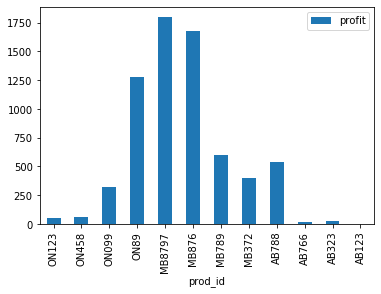

In [147]:
df.plot('prod_id', 'profit', kind='bar')

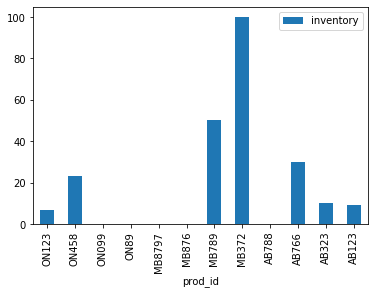

In [148]:
df.plot('prod_id','inventory', kind='bar')

In [149]:
df.groupby('location')['profit'].sum()

location
AB     590.0
MB    4480.0
ON    1706.0
Name: profit, dtype: float64

In [150]:
df.groupby(['location','sale_type'])[['num_sold','profit']].sum()

num_sold  profit
location sale_type                  
AB       B2B              19    48.0
         B2C              46   542.0
MB       B2B             150  1800.0
         B2C             620  2680.0
ON       B2B             166  1706.0

Text(0, 0.5, 'Num_sold')

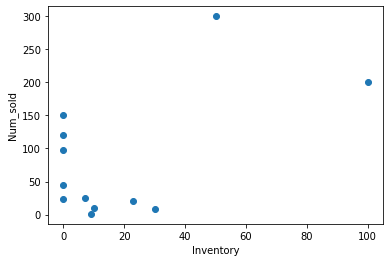

In [151]:
plt.scatter(df['inventory'],df['num_sold'])
plt.xlabel('Inventory')
plt.ylabel('Num_sold')

Text(0, 0.5, 'Inventory')

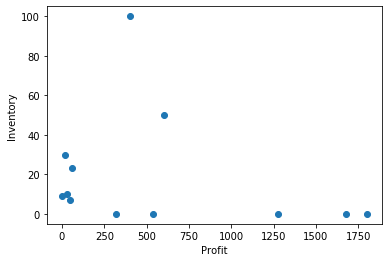

In [152]:
plt.scatter(df['profit'],df['inventory'])
plt.xlabel('Profit')
plt.ylabel('Inventory')

Text(0, 0.5, 'profit')

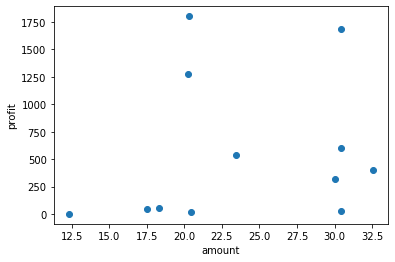

In [153]:
plt.scatter(df['amount'],df['profit'])
plt.xlabel('amount')
plt.ylabel('profit')

In [154]:
df

,prod_id,amount,margin,num_prod,num_sold,sale_type,Avg_days_to_sell,location,profit,inventory
0,ON123,17.50,2.0,32,25,B2B,15,ON,50.0,7
1,ON458,18.30,3.0,43,20,B2B,12,ON,60.0,23
2,ON099,30.05,14.0,23,23,B2B,1,ON,322.0,0
3,ON89,20.25,13.0,98,98,B2B,1,ON,1274.0,0
4,MB8797,20.34,12.0,150,150,B2B,2,MB,1800.0,0
5,MB876,30.45,14.0,120,120,B2C,2,MB,1680.0,0
6,MB789,30.45,2.0,350,300,B2C,4,MB,600.0,50
7,MB372,32.56,2.0,300,200,B2C,6,MB,400.0,100
8,AB788,23.45,12.0,45,45,B2C,1,AB,540.0,0
9,AB766,20.43,2.0,39,9,B2B,18,AB,18.0,30


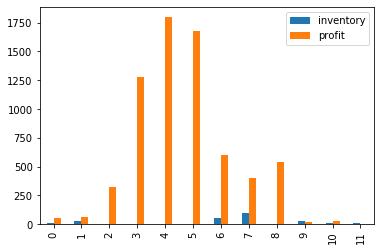

In [155]:
df[['inventory','profit']].plot(kind='bar')

In [156]:
df['scaled_profit2']=df['profit']/100

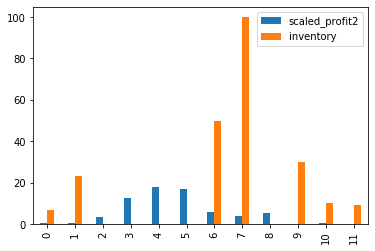

In [157]:
df[['scaled_profit2','inventory']].plot(kind='bar')

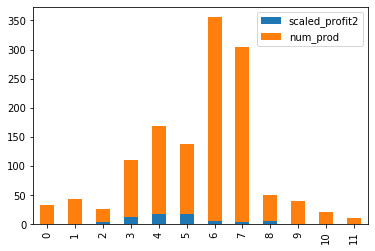

In [160]:
df[['scaled_profit2','num_prod']].plot(kind='bar', stacked=True)